In this notebook, we continue with training and testing of the data from the previous notebook. We will implement some classification as well as Decision Tree, Random Forest, and SVM/SVR.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

from sklearn import linear_model

In [2]:
abalone = pd.read_csv("abalone.data", header=None)
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height',
                  'Whole Weight', 'Shucked Weight', ' Viscera Weight',
                  'Shell Weight', 'Ring']
print(abalone.head())
print(abalone.tail())

  Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245   
1   M   0.350     0.265   0.090        0.2255          0.0995   
2   F   0.530     0.420   0.135        0.6770          0.2565   
3   M   0.440     0.365   0.125        0.5160          0.2155   
4   I   0.330     0.255   0.080        0.2050          0.0895   

    Viscera Weight  Shell Weight  Ring  
0           0.1010         0.150    15  
1           0.0485         0.070     7  
2           0.1415         0.210     9  
3           0.1140         0.155    10  
4           0.0395         0.055     7  
     Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.

In [3]:
#We have to change the sex, which is a categorical value, 
#to numeric value 0 and 1

abalone['Sex'].replace(['M', 'F', 'I'],[0,1,2], inplace=True)
print(abalone.head())


   Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
0    0   0.455     0.365   0.095        0.5140          0.2245   
1    0   0.350     0.265   0.090        0.2255          0.0995   
2    1   0.530     0.420   0.135        0.6770          0.2565   
3    0   0.440     0.365   0.125        0.5160          0.2155   
4    2   0.330     0.255   0.080        0.2050          0.0895   

    Viscera Weight  Shell Weight  Ring  
0           0.1010         0.150    15  
1           0.0485         0.070     7  
2           0.1415         0.210     9  
3           0.1140         0.155    10  
4           0.0395         0.055     7  


In [4]:
# Attribute and target split
X = abalone.drop(['Ring'], axis=1)
y = abalone[['Ring']]
print(X.head())
print(y.head())

   Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
0    0   0.455     0.365   0.095        0.5140          0.2245   
1    0   0.350     0.265   0.090        0.2255          0.0995   
2    1   0.530     0.420   0.135        0.6770          0.2565   
3    0   0.440     0.365   0.125        0.5160          0.2155   
4    2   0.330     0.255   0.080        0.2050          0.0895   

    Viscera Weight  Shell Weight  
0           0.1010         0.150  
1           0.0485         0.070  
2           0.1415         0.210  
3           0.1140         0.155  
4           0.0395         0.055  
   Ring
0    15
1     7
2     9
3    10
4     7


In [5]:
#convert to array to be passed to numpy

X = np.array(X)
y = np.array(y)

print(X)
print("-----------------------")
print(y)

[[ 0.      0.455   0.365  ...,  0.2245  0.101   0.15  ]
 [ 0.      0.35    0.265  ...,  0.0995  0.0485  0.07  ]
 [ 1.      0.53    0.42   ...,  0.2565  0.1415  0.21  ]
 ..., 
 [ 0.      0.6     0.475  ...,  0.5255  0.2875  0.308 ]
 [ 1.      0.625   0.485  ...,  0.531   0.261   0.296 ]
 [ 0.      0.71    0.555  ...,  0.9455  0.3765  0.495 ]]
-----------------------
[[15]
 [ 7]
 [ 9]
 ..., 
 [ 9]
 [10]
 [12]]


In [12]:
from sklearn.cross_validation import train_test_split 
from sklearn import linear_model

y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
#CLASSIFICATION

[[  2.30328038e+00  -8.54644318e-01  -6.42213116e-01  -1.15884434e-01
   -1.40761684e+00  -4.94560504e-01  -1.84205386e-01  -3.16422788e-01]
 [  2.22960873e+00  -6.01703923e-01  -4.87491804e-01  -6.14762665e-02
   -1.41166035e+00  -6.08131011e-01  -1.45421118e-01  -2.24099119e-01]
 [  8.05015661e-01  -2.50188403e+00  -1.95504274e+00  -6.27654912e-01
   -4.12040497e+00  -1.73320375e+00  -8.51997091e-01  -1.08274866e+00]
 [  0.00000000e+00  -6.52081114e+00  -4.99280625e+00  -1.70384537e+00
   -7.80074398e+00  -3.26721213e+00  -1.58303078e+00  -2.38312501e+00]
 [  0.00000000e+00  -9.84331484e-01  -1.52024659e+00  -2.09931507e-01
   -6.92976979e+00  -1.44680000e+00  -1.24570050e+00  -2.46723040e+00]
 [  5.75932549e-01   2.67803511e+00   9.88319439e-01   3.55079859e-01
   -5.42330568e+00   1.01336373e+00  -8.42450468e-01  -5.33254732e+00]
 [  0.00000000e+00   6.57775951e+00   4.38262704e+00   0.00000000e+00
   -5.09966935e+00   3.05211699e+00  -9.61699143e-02  -6.41958790e+00]
 [  5.0950866

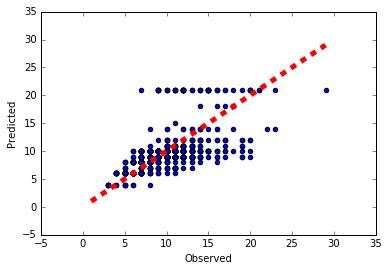

In [13]:
clf = linear_model.SGDClassifier(loss='hinge', penalty='elasticnet')
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=5)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

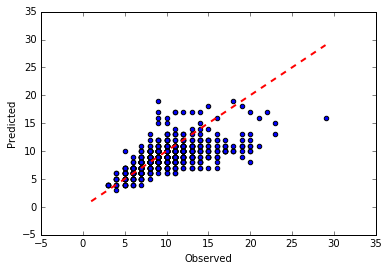

In [14]:
#ref: pp. 859-62.

from sklearn import neighbors

n_neighbors=5

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

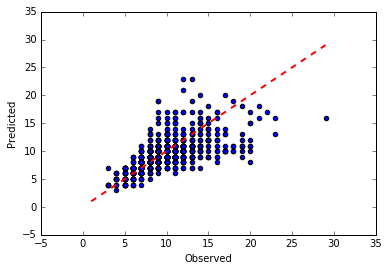

In [15]:
from sklearn import neighbors

n_neighbors=5

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

In [ ]:
#DECISION TREE, RANDOM FOREST

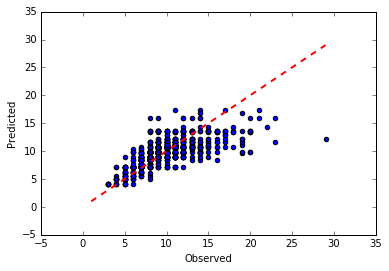

In [17]:
from sklearn.tree import DecisionTreeRegressor

#ref: p.946

clf = DecisionTreeRegressor(max_depth=5)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

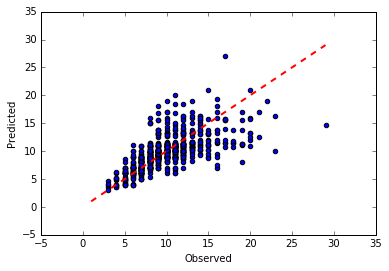

In [18]:
from sklearn.tree import DecisionTreeRegressor

#ref: p.946

clf = DecisionTreeRegressor(max_depth=10)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                   random_state=10)

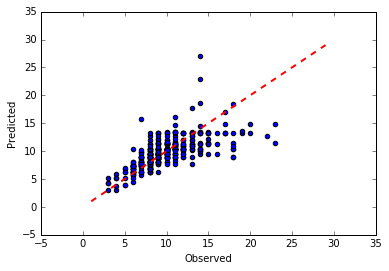

In [25]:
from sklearn.tree import DecisionTreeRegressor

#ref: p.946

clf = DecisionTreeRegressor(max_depth=7)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

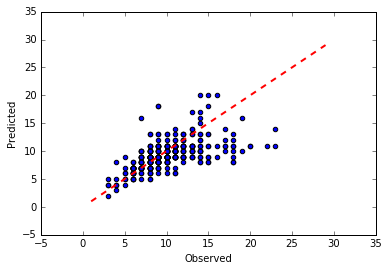

In [38]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train_scaled, y_train)
y_predict = clf.predict(X_test_scaled)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

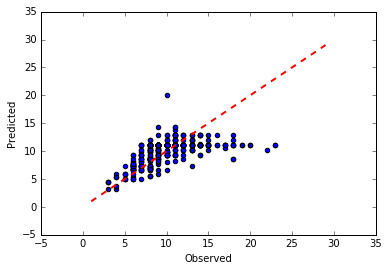

In [51]:
#Dimensionality reduction for decision tree

from sklearn.decomposition import RandomizedPCA

pca = RandomizedPCA(n_components=2, whiten=True).fit(X_train)
#X_reduced = pca.fit(X_train)
#print(pca.explained_variance_ratio_)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.1,
#                                                   random_state=10)

clf2 = DecisionTreeRegressor(max_depth=6)
clf2.fit(X_train_pca, y_train)
y_predict = clf2.predict(X_test_pca)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

In [41]:
X_reduced

PCA(copy=True, n_components=2, whiten=False)

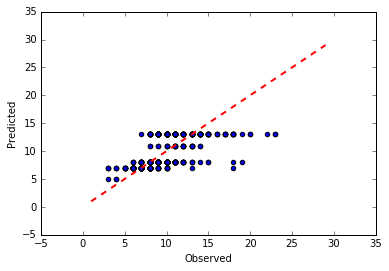

In [26]:
clf = linear_model.SGDClassifier(loss='hinge', penalty='l2')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

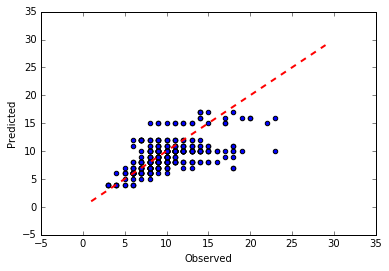

In [34]:
clf = linear_model.SGDClassifier(loss='hinge', penalty='l2')
clf.fit(X_train_scaled, y_train)
y_predict = clf.predict(X_test_scaled)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

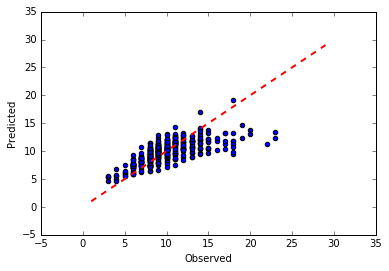

In [50]:
#bagging - drawing samples with replacement
#ref: 0.16.1 p. 116

from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge

bagging = BaggingRegressor(Ridge(), max_samples=0.5, max_features=0.5)

bagging.fit(X_train_scaled, y_train)
y_predict = bagging.predict(X_test_scaled)
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')



In [63]:
bagging_score = cross_val_score(bagging, X, y)
print("Bagging score: ", bagging_score.mean())

Bagging score:  0.448224435909


In [61]:
#some method of bagging-similar to cv

from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

clf = DecisionTreeRegressor(max_depth=None,
                            min_samples_split=1,
                            random_state=0)
scores = cross_val_score(clf,X,y)
print("Score of Decision Tree: ", scores.mean())

clf2 = RandomForestRegressor(n_estimators=10, max_depth=None,
                             min_samples_split=1, random_state=0)
scores2 = cross_val_score(clf2, X, y)
print("Score of Random Forest: ", scores2.mean())

clf3 = ExtraTreesRegressor(n_estimators=10, max_depth=None,
                             min_samples_split=1, random_state=0)
scores3 = cross_val_score(clf3, X, y)
print("Score of Extra Tree: ", scores3.mean())

clf4 = AdaBoostRegressor(n_estimators=1000)
scores4 = cross_val_score(clf4, X, y)
print("Score of AdaBoost: ", scores4.mean())

Score of Decision Tree:  -0.0078102739845
Score of Random Forest:  0.481054170894
Score of Extra Tree:  0.459585808678
Score of AdaBoost:  0.110174631205


In [66]:
#Gradient Tree Boosting
#another method of bagging-similar to CV

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                max_depth=None, random_state=0)
clf.fit(X_train_scaled, y_train)
print("Gradient Boosting Classifier score: ", clf.score(X_test_scaled, y_test))

clf2 = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0,
                                max_depth=None, random_state=0, loss='ls')
clf2.fit(X_train_scaled, y_train)
print("Gradient Boosting Classifier score: ", clf2.score(X_test_scaled, y_test))
print(clf2.feature_importances_)

Gradient Boosting Classifier score:  0.145933014354
Gradient Boosting Classifier score:  0.210641213945
[ 0.00026287  0.00053111  0.00058888  0.00049701  0.00077253  0.00174656
  0.00060323  0.00499781]


Feature ranking:
1. feature 7 (0.270943)
2. feature 5 (0.136284)
3. feature 4 (0.120715)
4. feature 2 (0.120529)
5. feature 1 (0.102529)
6. feature 3 (0.087253)
7. feature 6 (0.086923)
8. feature 0 (0.074823)


(-1, 8)

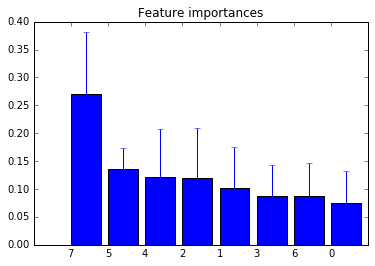

In [76]:
#Feature importances with forest of trees
#ref: 0.16.1 p 666

from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor

forest = ExtraTreesRegressor(n_estimators=250, random_state=0)
forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
            axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(8):
    print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(8), importances[indices],
       color="b", yerr=std[indices])
plt.xticks(range(8), indices)
plt.xlim([-1,8])



In [79]:
#Support Vector Regression

from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree = 2)

y_rbf = svr_rbf.fit(X_train_scaled, y_train).predict(X_test_scaled)
y_lin = svr_lin.fit(X_train_scaled, y_train).predict(X_test_scaled)
y_poly = svr_poly.fit(X_train_scaled, y_train).predict(X_test_scaled)



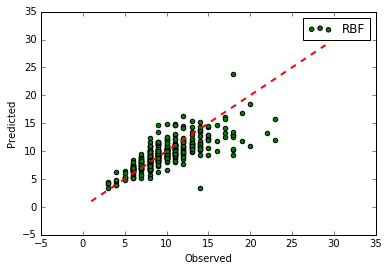

In [82]:

fig, ax = plt.subplots()
ax.scatter(y_test, y_rbf, c='g', label='RBF')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
plt.legend(loc='best')


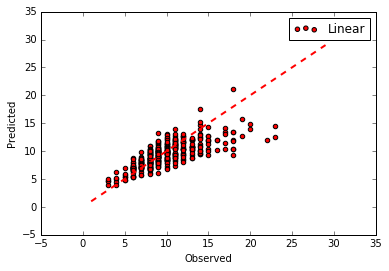

In [84]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_lin, c='r', label='Linear')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
plt.legend(loc='best')


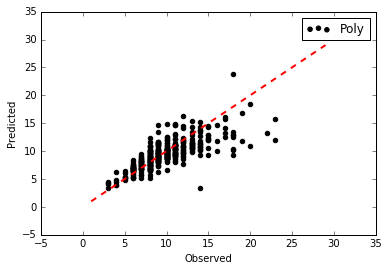

In [85]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_rbf, c='k', label='Poly')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
plt.legend(loc='best')

In [89]:
from sklearn import cross_validation

scores_rbf = cross_validation.cross_val_score(svr_rbf, X, y, cv=5)
print("RBF score: ", scores_rbf)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_rbf.mean(), scores_rbf.std() * 2))

scores_lin = cross_validation.cross_val_score(svr_lin, X, y, cv=5)
print("Linear score: ", scores_lin)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_lin.mean(), scores_lin.std() * 2))


scores_poly = cross_validation.cross_val_score(svr_poly, X, y, cv=5)
print("Poly score: ", scores_poly)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_poly.mean(), scores_poly.std() * 2))



RBF score:  [ 0.39970977  0.50272058  0.51326259  0.56841088  0.54204888]
Accuracy: 0.51 (+/- 0.12)
Linear score:  [ 0.30083898  0.3654243   0.45666379  0.53253179  0.48289514]
Accuracy: 0.43 (+/- 0.17)
Poly score:  [ 0.31793489  0.43035616  0.45980916  0.56312694  0.48158501]
Accuracy: 0.45 (+/- 0.16)
